In [2]:
!pip install matplotlib seaborn pandas


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 7.3 MB/s  0:00:01m 7.2 MB/s eta 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.0 MB/s  0:00:00m 9.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]━━━ 6/7 [seaborn]atplotlib]


In [3]:
# Import necessary libraries for data analysis and plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Setup for plotting ---
# This makes our plots look a bit nicer
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# --- Load the Data ---
# Define the path to our data file
DATA_PATH = Path("../data/raw/stock_prices.csv")

# Load the CSV into a pandas DataFrame
# We tell it to use the 'Date' column as the index and to parse it as dates
df = pd.read_csv(DATA_PATH, index_col='Date', parse_dates=True)

# --- Initial Inspection ---
# Display the first 5 rows to make sure it loaded correctly
print("--- First 5 Rows ---")
display(df.head())

# Display a summary of the DataFrame (column names, data types, non-null values)
print("\n--- Data Info ---")
df.info()

--- First 5 Rows ---


,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2020-01-01,596.155518,519.137878,646.518738,675.324219,1986.125366
2020-01-02,599.955444,522.861572,644.632263,686.821167,1977.008545
2020-01-03,591.399658,521.169006,654.547119,687.648865,2016.408081
2020-01-06,578.600952,508.450562,648.273621,671.700745,2016.225220
2020-01-07,587.762817,505.742371,638.665955,682.034546,2021.172974



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1415 entries, 2020-01-01 to 2025-09-15
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HDFCBANK.NS   1415 non-null   float64
 1   ICICIBANK.NS  1415 non-null   float64
 2   INFY.NS       1415 non-null   float64
 3   RELIANCE.NS   1415 non-null   float64
 4   TCS.NS        1415 non-null   float64
dtypes: float64(5)
memory usage: 66.3 KB


/Users/vachanP/Desktop/muthbazi/coding/projects/optimiser/portfolio-optimizer/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


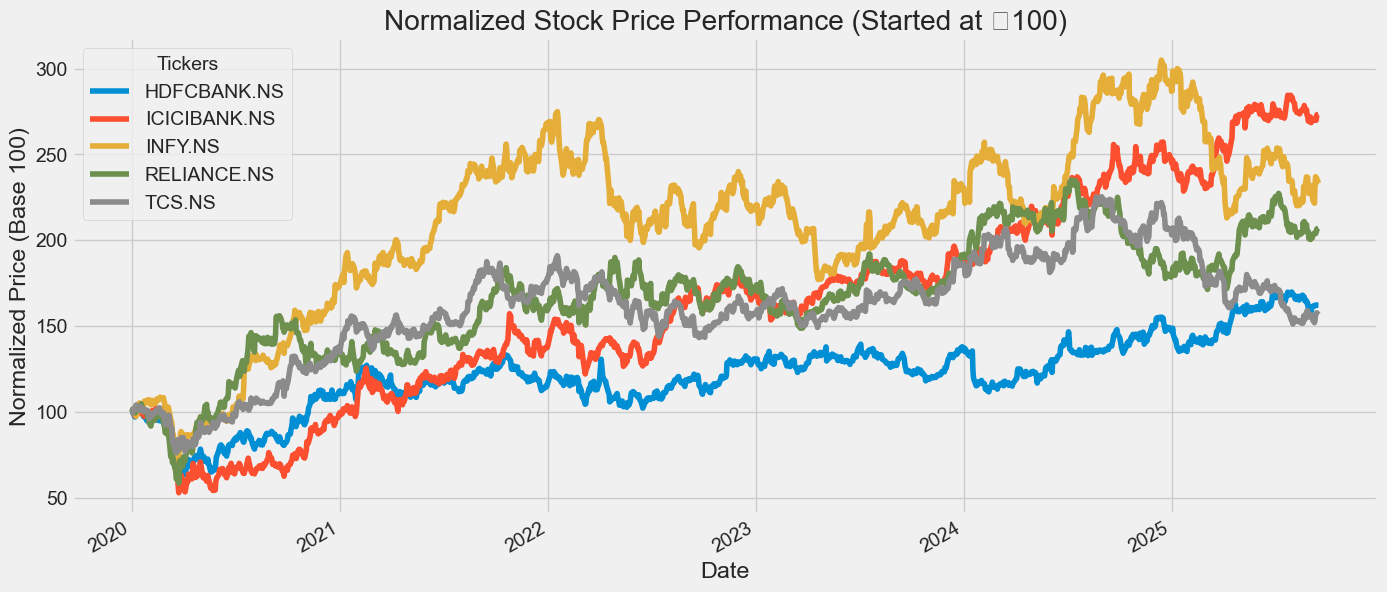

In [12]:
# --- Plotting Normalized Stock Prices ---

# Normalize the data: (each price / price on the first day) * 100
# df.iloc[0] gets the first row (our starting prices)
normalized_df = (df / df.iloc[0]) * 100

# Create the plot
plt.figure(figsize=(15, 7))
normalized_df.plot(ax=plt.gca()) # ax=plt.gca() ensures it plots on the figure we just created

# Add titles and labels for clarity
plt.title('Normalized Stock Price Performance (Started at ₹100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.legend(title='Tickers')
plt.grid(True)

# Show the plot
plt.show()

--- First 5 Daily Returns ---


,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2020-01-02,0.64,0.72,-0.29,1.70,-0.46
2020-01-03,-1.43,-0.32,1.54,0.12,1.99
2020-01-06,-2.16,-2.44,-0.96,-2.32,-0.01
2020-01-07,1.58,-0.53,-1.48,1.54,0.25
2020-01-08,-0.26,0.58,-1.33,-0.75,2.24


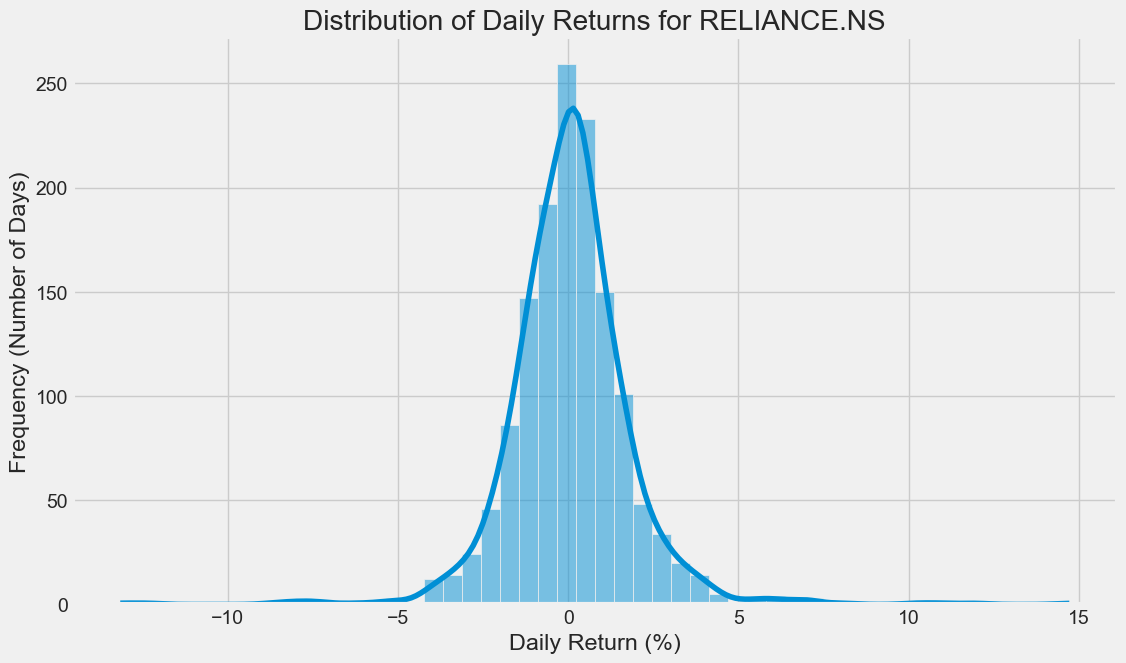

In [13]:
# --- Calculate and Plot Daily Returns ---

# Calculate the daily percentage change in price
# .pct_change() is a convenient pandas function for this
daily_returns = df.pct_change()

# The first day will have no return (NaN), so we drop it
daily_returns = daily_returns.dropna()

print("--- First 5 Daily Returns ---")
# We multiply by 100 to show it as a percentage
display((daily_returns.head() * 100).round(2)) 


# --- Plot the distribution of returns for a single stock (e.g., RELIANCE.NS) ---
plt.figure(figsize=(12, 7))
sns.histplot(daily_returns['RELIANCE.NS'] * 100, bins=50, kde=True) # kde plots a smooth line over the bars

plt.title('Distribution of Daily Returns for RELIANCE.NS')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency (Number of Days)')
plt.grid(True)
plt.show()

--- Correlation Matrix ---


,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
HDFCBANK.NS,1.000000,0.636893,0.346896,0.441270,0.303756
ICICIBANK.NS,0.636893,1.000000,0.369817,0.435760,0.327514
INFY.NS,0.346896,0.369817,1.000000,0.353951,0.712224
RELIANCE.NS,0.441270,0.435760,0.353951,1.000000,0.381792
TCS.NS,0.303756,0.327514,0.712224,0.381792,1.000000


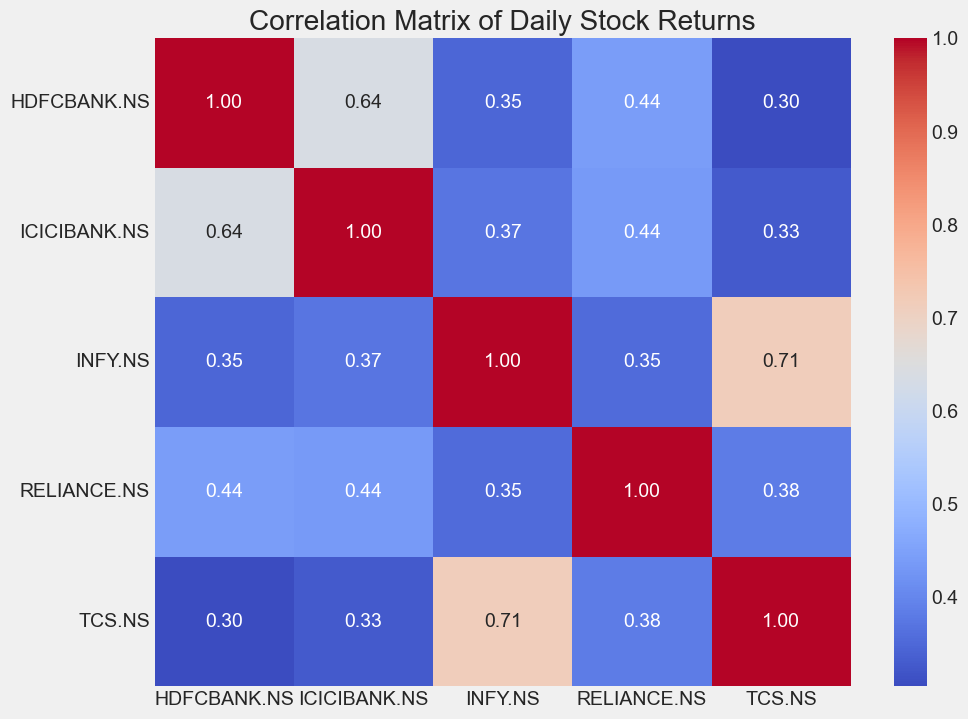

In [14]:
# --- Calculate and Plot Correlation ---

# The .corr() method calculates the correlation between all columns
correlation_matrix = daily_returns.corr()

print("--- Correlation Matrix ---")
display(correlation_matrix)

# Now, let's visualize this matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# annot=True writes the data value in each cell
# cmap='coolwarm' is the color scheme
# fmt=".2f" formats the numbers to two decimal places

plt.title('Correlation Matrix of Daily Stock Returns')
plt.show()

In [15]:
!pip install pandas-ta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 201.6 kB/s  0:00:16194.1 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 700.3 kB/s  0:01:08 eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 350.8 kB/s  0:00:14a 0:00:010:00:01:02
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas-ta]━ 3/4 [pandas-ta]


In [16]:
!pip install newsapi-python python-dotenv